There are two solutions for the Task 2 of the Quantium Virtual Internship.
The first solution is using combined correlation to find the nearest similarity based on sales revenue and no. of customer
between control stores to the trial stores.
The second solution is using nearest neighbour algorithm to find the control store that most similar to trail store using ales revenue, no. of customer and number of transactions per customer as metrics to measure the similarity.

In [478]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import statistics 
from scipy.stats import sem, t
from scipy import mean
from numpy import linalg 
from sklearn.preprocessing import MinMaxScaler
import operator
from functools import reduce



### read the purchase_behaviour dataset

QVI_data = pd.read_csv('QVI_data.csv')

QVI_data.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream


In [479]:
QVI_data['STORE_NBR'].unique().size

272

In [480]:
QVI_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   LYLTY_CARD_NBR    264834 non-null  int64  
 1   DATE              264834 non-null  object 
 2   STORE_NBR         264834 non-null  int64  
 3   TXN_ID            264834 non-null  int64  
 4   PROD_NBR          264834 non-null  int64  
 5   PROD_NAME         264834 non-null  object 
 6   PROD_QTY          264834 non-null  int64  
 7   TOT_SALES         264834 non-null  float64
 8   PACK_SIZE         264834 non-null  int64  
 9   BRAND             264834 non-null  object 
 10  LIFESTAGE         264834 non-null  object 
 11  PREMIUM_CUSTOMER  264834 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 19.2+ MB


In [481]:
QVI_data['DATE'].min()

'2018-07-01'

In [482]:
QVI_data['DATE'].max()

'2019-06-30'

In [483]:
#The client has selected store numbers 77, 86 and 88 as trial stores and want control stores to be 
# established stores that are operational for the entire observation period.
#match trial stores to control stores that are similar to the trial store prior to the trial period of Feb 2019 in terms of :
##- Monthly overall sales revenue
##- Monthly number of customers
##- Monthly number of transactions per customer


In [484]:

#### Add a new month ID column in the data with the format yyyymm.

QVI_data['Month_Year'] = pd.to_datetime(QVI_data['DATE']).dt.to_period('M')


print(QVI_data)

        LYLTY_CARD_NBR        DATE  STORE_NBR  TXN_ID  PROD_NBR  \
0                 1000  2018-10-17          1       1         5   
1                 1002  2018-09-16          1       2        58   
2                 1003  2019-03-07          1       3        52   
3                 1003  2019-03-08          1       4       106   
4                 1004  2018-11-02          1       5        96   
...                ...         ...        ...     ...       ...   
264829         2370701  2018-12-08         88  240378        24   
264830         2370751  2018-10-01         88  240394        60   
264831         2370961  2018-10-24         88  240480        70   
264832         2370961  2018-10-27         88  240481        65   
264833         2373711  2018-12-14         88  241815        16   

                                       PROD_NAME  PROD_QTY  TOT_SALES  \
0         Natural Chip        Compny SeaSalt175g         2        6.0   
1          Red Rock Deli Chikn&Garlic Aioli 150g 

In [485]:
## For each store and month calculate total sales

Monthly_overall_sales_revenue = QVI_data.groupby(['STORE_NBR','Month_Year'])['TOT_SALES'].sum()
print(Monthly_overall_sales_revenue)

STORE_NBR  Month_Year
1          2018-07       206.9
           2018-08       176.1
           2018-09       278.8
           2018-10       188.1
           2018-11       192.6
                         ...  
272        2019-02       395.5
           2019-03       442.3
           2019-04       445.1
           2019-05       314.6
           2019-06       312.1
Name: TOT_SALES, Length: 3169, dtype: float64


In [486]:
## For each store and month calculate number of customers

Monthly_number_of_customers = QVI_data.groupby(['STORE_NBR','Month_Year'])['LYLTY_CARD_NBR'].agg(lambda x: len(x.unique()))

print(Monthly_number_of_customers)

STORE_NBR  Month_Year
1          2018-07       49
           2018-08       42
           2018-09       59
           2018-10       44
           2018-11       46
                         ..
272        2019-02       45
           2019-03       50
           2019-04       54
           2019-05       34
           2019-06       34
Name: LYLTY_CARD_NBR, Length: 3169, dtype: int64


In [487]:
## For each store and month calculate number of transactions per customer

Monthly_number_of_transactions = QVI_data.groupby(['STORE_NBR','Month_Year'])['TXN_ID'].agg(lambda x: len(x.unique()))
print(Monthly_number_of_transactions)


Monthly_number_of_transactions_per_customer= Monthly_number_of_transactions / Monthly_number_of_customers

print(Monthly_number_of_transactions_per_customer)

STORE_NBR  Month_Year
1          2018-07       52
           2018-08       43
           2018-09       62
           2018-10       45
           2018-11       47
                         ..
272        2019-02       48
           2019-03       53
           2019-04       55
           2019-05       40
           2019-06       37
Name: TXN_ID, Length: 3169, dtype: int64
STORE_NBR  Month_Year
1          2018-07       1.061224
           2018-08       1.023810
           2018-09       1.050847
           2018-10       1.022727
           2018-11       1.021739
                           ...   
272        2019-02       1.066667
           2019-03       1.060000
           2019-04       1.018519
           2019-05       1.176471
           2019-06       1.088235
Length: 3169, dtype: float64


In [488]:
## For each store and month calculate number of chips per customer

nChips = QVI_data.groupby(['STORE_NBR','Month_Year'])['PROD_QTY'].sum()
#print(nChips)


nChipsPerTxn = nChips / Monthly_number_of_transactions

print(nChipsPerTxn)

STORE_NBR  Month_Year
1          2018-07       1.192308
           2018-08       1.255814
           2018-09       1.209677
           2018-10       1.288889
           2018-11       1.212766
                           ...   
272        2019-02       1.895833
           2019-03       1.905660
           2019-04       1.909091
           2019-05       1.775000
           2019-06       1.891892
Length: 3169, dtype: float64


In [489]:
## For each store and month calculate the average price per unit

avgPricePerUnit = Monthly_overall_sales_revenue / nChips 
print(avgPricePerUnit)

STORE_NBR  Month_Year
1          2018-07       3.337097
           2018-08       3.261111
           2018-09       3.717333
           2018-10       3.243103
           2018-11       3.378947
                           ...   
272        2019-02       4.346154
           2019-03       4.379208
           2019-04       4.239048
           2019-05       4.430986
           2019-06       4.458571
Length: 3169, dtype: float64


In [490]:
## merge the metrics measures in one dataframe

metrics_data = pd.DataFrame(data = Monthly_overall_sales_revenue )

#print(metrics_data)

metrics_data['NoCustomer'] = Monthly_number_of_customers
metrics_data['NoTxnPerCustomer'] = Monthly_number_of_transactions_per_customer
metrics_data['NoChipsPerTxn'] = nChipsPerTxn
metrics_data['AvgPricePerUnit']  = avgPricePerUnit

metrics_data = metrics_data.reset_index()

print(metrics_data)

      STORE_NBR Month_Year  TOT_SALES  NoCustomer  NoTxnPerCustomer  \
0             1    2018-07      206.9          49          1.061224   
1             1    2018-08      176.1          42          1.023810   
2             1    2018-09      278.8          59          1.050847   
3             1    2018-10      188.1          44          1.022727   
4             1    2018-11      192.6          46          1.021739   
...         ...        ...        ...         ...               ...   
3164        272    2019-02      395.5          45          1.066667   
3165        272    2019-03      442.3          50          1.060000   
3166        272    2019-04      445.1          54          1.018519   
3167        272    2019-05      314.6          34          1.176471   
3168        272    2019-06      312.1          34          1.088235   

      NoChipsPerTxn  AvgPricePerUnit  
0          1.192308         3.337097  
1          1.255814         3.261111  
2          1.209677         3.

In [491]:
### find the stores without full observation periods

storesWithFullObs = metrics_data.groupby('STORE_NBR').count() == 12

stores_WithOut_FullObs = storesWithFullObs[storesWithFullObs['Month_Year'] == False]

stores_WithOut_FullObs.index.to_list()

[11, 31, 44, 76, 85, 92, 117, 193, 206, 211, 218, 252]

In [492]:
### Filter to the pre-trial period and stores with full observation periods

preTrialMeasures = metrics_data[metrics_data['Month_Year'] <'2019-02']


preTrialMeasures  =  preTrialMeasures[~ metrics_data.STORE_NBR.isin(stores_WithOut_FullObs.index.to_list())]
print(preTrialMeasures)

      STORE_NBR Month_Year  TOT_SALES  NoCustomer  NoTxnPerCustomer  \
0             1    2018-07      206.9          49          1.061224   
1             1    2018-08      176.1          42          1.023810   
2             1    2018-09      278.8          59          1.050847   
3             1    2018-10      188.1          44          1.022727   
4             1    2018-11      192.6          46          1.021739   
...         ...        ...        ...         ...               ...   
3159        272    2018-09      304.7          32          1.125000   
3160        272    2018-10      430.6          44          1.136364   
3161        272    2018-11      376.2          41          1.097561   
3162        272    2018-12      403.9          47          1.000000   
3163        272    2019-01      423.0          46          1.086957   

      NoChipsPerTxn  AvgPricePerUnit  
0          1.192308         3.337097  
1          1.255814         3.261111  
2          1.209677         3.

C:\Users\Soona\anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [493]:
### find the control stores

control_Stores = preTrialMeasures[~ preTrialMeasures.STORE_NBR.isin([77, 86, 88 ])]

print(control_Stores)

      STORE_NBR Month_Year  TOT_SALES  NoCustomer  NoTxnPerCustomer  \
0             1    2018-07      206.9          49          1.061224   
1             1    2018-08      176.1          42          1.023810   
2             1    2018-09      278.8          59          1.050847   
3             1    2018-10      188.1          44          1.022727   
4             1    2018-11      192.6          46          1.021739   
...         ...        ...        ...         ...               ...   
3159        272    2018-09      304.7          32          1.125000   
3160        272    2018-10      430.6          44          1.136364   
3161        272    2018-11      376.2          41          1.097561   
3162        272    2018-12      403.9          47          1.000000   
3163        272    2019-01      423.0          46          1.086957   

      NoChipsPerTxn  AvgPricePerUnit  
0          1.192308         3.337097  
1          1.255814         3.261111  
2          1.209677         3.

In [494]:
## find three trial stores
trial_stores = preTrialMeasures[preTrialMeasures.STORE_NBR.isin([77, 86, 88 ])]
print(trial_stores)

      STORE_NBR Month_Year  TOT_SALES  NoCustomer  NoTxnPerCustomer  \
880          77    2018-07     296.80          51          1.078431   
881          77    2018-08     255.50          47          1.021277   
882          77    2018-09     225.20          42          1.047619   
883          77    2018-10     204.50          37          1.027027   
884          77    2018-11     245.30          41          1.073171   
885          77    2018-12     267.30          46          1.043478   
886          77    2019-01     204.40          35          1.114286   
977          86    2018-07     892.20          99          1.272727   
978          86    2018-08     764.05          94          1.170213   
979          86    2018-09     914.60         103          1.242718   
980          86    2018-10     948.40         109          1.266055   
981          86    2018-11     918.00         100          1.250000   
982          86    2018-12     841.20          98          1.224490   
983   

In [495]:
### create function returns the total sales and number of customer for each store

def Store_performance(store_no):
    
    trialStore_sales = preTrialMeasures[preTrialMeasures['STORE_NBR']== store_no]
    trialStore_sales = trialStore_sales.iloc[:, 0:4]
    
    return trialStore_sales

Store_performance(77)

,STORE_NBR,Month_Year,TOT_SALES,NoCustomer
880,77,2018-07,296.8,51
881,77,2018-08,255.5,47
882,77,2018-09,225.2,42
883,77,2018-10,204.5,37
884,77,2018-11,245.3,41
885,77,2018-12,267.3,46
886,77,2019-01,204.4,35


In [496]:

## Create a function to calculate correlation for a measure

def correlation_fun (store_nbr1, store_nbr2, metricCol):
    trialStore1 = Store_performance(store_nbr1)
    trialStore2 = Store_performance(store_nbr2)
    
   
    frames = [trialStore1, trialStore2]
    result = pd.concat(frames)
    
    result = result.pivot(index='Month_Year', columns='STORE_NBR', values= metricCol)
    result = result.reset_index()
    #print(result)
    corr = result.corr(method='pearson', min_periods=1)
    
    return corr.values[0][1]
    


In [497]:
## looping correlation function through each control store

import operator
def correlation_score(trail_store, metricCol):
    dic ={}
    for i in control_Stores['STORE_NBR'].unique():
        dic[i] = correlation_fun (trail_store, i, metricCol)
     
    return dic



In [498]:
### calculate a standardised metric based on the absolute difference between the trial store's performance 
### and each control store's performance.

#### Calculate Euclidean distance 


def calculateMagnitudeDistance (store_nbr1, store_nbr2, metricCol):
    trialStore1 = Store_performance(store_nbr1)
    trialStore2 = Store_performance(store_nbr2)
    
   
    frames = [trialStore1, trialStore2]
    result = pd.concat(frames)
    #print(result)
    result = result.pivot(index='Month_Year', columns='STORE_NBR', values= metricCol)
    result = result.reset_index()
    
    result['Abs_Diff'] = abs(result[store_nbr1] - result[store_nbr2])
    #print(result)
    scaled_corr =  MinMaxScaler().fit_transform(result[['Abs_Diff']])
   
    final_corr = np.mean(scaled_corr)
    return final_corr



In [499]:

## looping MagnitudeDistance function through each control store

##Sales
import operator
def MagnitudeDistance_score (trail_store, metricCol):
    dic ={}
    for i in control_Stores['STORE_NBR'].unique():
        dic[i] = calculateMagnitudeDistance (trail_store, i, metricCol)
     
    return dic

#print(most_corr(77, 'TOT_SALES'))

In [500]:
###  Create a combined score composed of correlation and magnitude by first merging the correlations table with 
### the magnitude table with 0.7 weight for total sales and 0.3 weight for num. of customer

def total_corr(x1, x2):
    wieght = 0.7
    total_corr = (wieght * x1) + ((1-wieght) * x2) 
    
    return total_corr


In [501]:

## creat function for Taking average of total_sales_corr and num_customer_corr and average for MagnitudeDistances 
## and then combining the correlations

def nearest_sim_dic (trial_store_no):
    
    total_sales_corr = correlation_score(trial_store_no, 'TOT_SALES')
    num_customer_corr = correlation_score(trial_store_no, 'NoCustomer')

    score_corr = { }
    for (k1,v1), (k2,v2) in zip(total_sales_corr.items(), num_customer_corr.items()):
        new_value = (v1+v2) / 2
        score_corr[k1] = new_value


    total_sales_MagnitudeDistance = MagnitudeDistance_score(trial_store_no, 'TOT_SALES')
    num_customer_MagnitudeDistance = MagnitudeDistance_score(trial_store_no, 'NoCustomer')

    score_M_Distance  = { }
    for (k1,v1), (k2,v2) in zip(total_sales_MagnitudeDistance .items(), num_customer_MagnitudeDistance.items()):
        new_value = (v1+v2) / 2
        score_M_Distance[k1] = new_value


    final_score  = { }
    for (k1,v1), (k2,v2) in zip(score_corr.items(), score_M_Distance.items()):
        final_value = total_corr(v1, v2)
        final_score[k1] = final_value

    sorted_final_score = sorted(final_score.items(), key=operator.itemgetter(1),reverse=True)

    return sorted_final_score[:10]

In [502]:
##return the top 10 most similarity between trial store 77 and control stores. 

nearest_sim_dic (77)

[(119, 0.8157330501937146),
 (233, 0.7928966867857572),
 (3, 0.7223914136527739),
 (41, 0.718712363191411),
 (17, 0.7093589994002234),
 (71, 0.6986755326684424),
 (113, 0.6773558988982562),
 (254, 0.6704155283230807),
 (157, 0.6642043766578577),
 (84, 0.6598680302091828)]

We can see that the control store 119 is the most similar store to the trial store 77.

In [503]:
 ## return the top 10 most similarity between trial store 86 and control stores. 
    
nearest_sim_dic (86)


[(155, 0.7479441018851871),
 (260, 0.7245429959207481),
 (114, 0.7064441297538457),
 (138, 0.678624013942009),
 (132, 0.6592833003967618),
 (109, 0.6476432447516253),
 (240, 0.6375195850134762),
 (176, 0.6199885744661158),
 (147, 0.5979631056152326),
 (75, 0.5964421462706393)]

 the control store 155 is the most similar store to the trial store 86.

In [504]:
## return the top 10 most similarity between trial store 88 and control stores. 

nearest_sim_dic (88)


[(178, 0.728071976269987),
 (14, 0.7212152354502623),
 (204, 0.6697320119307376),
 (113, 0.6489856399162187),
 (253, 0.6000590219075348),
 (134, 0.5920150983497195),
 (69, 0.5919993659709719),
 (161, 0.5776619844389792),
 (187, 0.571776009636373),
 (167, 0.5678974948519168)]

 the control store 178 is the most similar store to the trial store 88.

Store_type  Control_store  Other_stores  Trial_store
Month_Year                                          
2018-07           1205.70    620.351515        296.8
2018-08           1079.75    600.558621        255.5
2018-09           1021.50    607.920992        225.2
2018-10           1037.90    620.430798        204.5
2018-11           1008.00    606.795420        245.3
2018-12           1121.60    638.024904        267.3
2019-01           1051.70    618.337931        204.4
2019-02           1197.70    569.588931        235.0


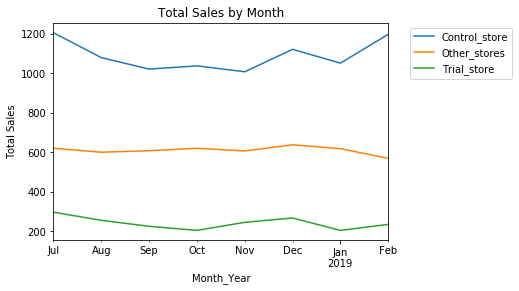

In [505]:
## The store with the highest score is selected as the control store since it is
## most similar to the trial store 77 .


## check visually if the drivers are indeed similar in the period before the trial 77 based on total sales

from matplotlib import pyplot

Monthly_mean_sales_revenue77 = QVI_data.groupby(['STORE_NBR','Month_Year'])['TOT_SALES'].sum().reset_index()

Monthly_mean_sales_revenue77 = Monthly_mean_sales_revenue77[Monthly_mean_sales_revenue77['Month_Year'] <'2019-03']

conditions = [
    (Monthly_mean_sales_revenue77['STORE_NBR']==77),
    (Monthly_mean_sales_revenue77['STORE_NBR']==3),
    ((Monthly_mean_sales_revenue77['STORE_NBR']!=77) & (Monthly_mean_sales_revenue77['STORE_NBR']!=3))
     ]

values = ['Trial_store', 'Control_store', 'Other_stores']

Monthly_mean_sales_revenue77['Store_type'] = np.select(conditions, values)
Monthly_mean_sales_revenue77 = Monthly_mean_sales_revenue77.groupby(['Month_Year', 'Store_type'])['TOT_SALES'].mean().reset_index()
povit_sales77 = Monthly_mean_sales_revenue77.pivot(index='Month_Year', columns='Store_type', values= 'TOT_SALES')

print(povit_sales77)

fig,ax = plt.subplots(1)
ax.set_xlabel("Month of Operation")   
ax.set_ylabel("Total Sales")

povit_sales77.plot(kind='line' , title='Total Sales by Month', ax=ax).legend( bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='medium')

Store_type  Control_store  Other_stores  Trial_store
Month_Year                                          
2018-07             112.0     70.518939         51.0
2018-08             112.0     71.107280         47.0
2018-09             102.0     68.881679         42.0
2018-10             104.0     70.072243         37.0
2018-11             101.0     69.301527         41.0
2018-12             111.0     72.486590         46.0
2019-01             102.0     70.214559         35.0
2019-02             116.0     65.221374         45.0


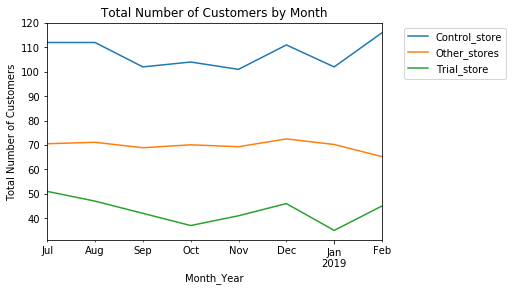

In [506]:
## The store with the highest score is selected as the control store since it is
## most similar to the trial store 77 .

## check visually if the drivers are indeed similar in the period before the trial 77 based on number of customers

from matplotlib import pyplot

Monthly_mean_customer_revenue77 = QVI_data.groupby(['STORE_NBR','Month_Year'])['LYLTY_CARD_NBR'].agg(lambda x: len(x.unique())).reset_index()

Monthly_mean_customer_revenue77 = Monthly_mean_customer_revenue77[Monthly_mean_customer_revenue77['Month_Year'] <'2019-03']

conditions = [
    (Monthly_mean_customer_revenue77['STORE_NBR']==77),
    (Monthly_mean_customer_revenue77['STORE_NBR']==3),
    ((Monthly_mean_customer_revenue77['STORE_NBR']!=77) & (Monthly_mean_customer_revenue77['STORE_NBR']!=3))
     ]

values = ['Trial_store', 'Control_store', 'Other_stores']

Monthly_mean_customer_revenue77['Store_type'] = np.select(conditions, values)
Monthly_mean_customer_revenue77 = Monthly_mean_customer_revenue77.groupby(['Month_Year', 'Store_type'])['LYLTY_CARD_NBR'].mean().reset_index()
povit_customer77 = Monthly_mean_customer_revenue77.pivot(index='Month_Year', columns='Store_type', values= 'LYLTY_CARD_NBR')

print(povit_customer77)

fig,ax = plt.subplots(1)
ax.set_xlabel("Month of Operation")   
ax.set_ylabel("Total Number of Customers")

povit_customer77.plot(kind='line',  title="Total Number of Customers by Month", ax=ax).legend( bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='medium')

Store_type  Control_store  Trial_store  Control_5th%_confidence  \
Month_Year                                                        
2018-07            1074.4        296.8              1026.244151   
2018-08             991.1        255.5               942.944151   
2018-09             988.4        225.2               940.244151   
2018-10             860.8        204.5               812.644151   
2018-11             965.2        245.3               917.044151   
2018-12             983.8        267.3               935.644151   
2019-01             935.1        204.4               886.944151   
2019-02            1004.3        235.0               956.144151   
2019-03             977.7        278.5               929.544151   
2019-04             879.1        263.5               830.944151   
2019-05             807.2        299.3               759.044151   
2019-06             871.4        264.7               823.244151   

Store_type  Control_95th%_confidence  
Month_Year            

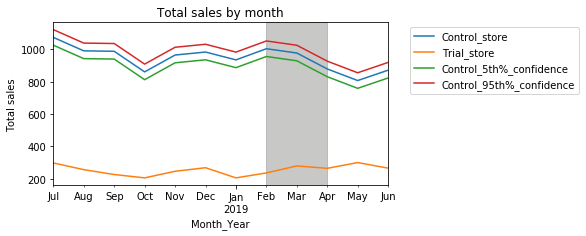

In [507]:

### Assessment of Trial
### The trial period goes from the start of February 2019 to April 2019. We now want to see if there has been 
### an uplift in overall chip sales.




Monthly_mean_sales_store77 = QVI_data.groupby(['STORE_NBR','Month_Year'])['TOT_SALES'].sum().reset_index()

####################################################################
conditions = [
    (Monthly_mean_sales_store77['STORE_NBR']==77),
    (Monthly_mean_sales_store77['STORE_NBR']==119),
    ((Monthly_mean_sales_store77['STORE_NBR']!=77) & (Monthly_mean_sales_store77['STORE_NBR']!=119))
     ]

values = ['Trial_store', 'Control_store', 'Other_stores']

Monthly_mean_sales_store77['Store_type'] = np.select(conditions, values)

Monthly_mean_sales_store77 = Monthly_mean_sales_store77.groupby(['Month_Year', 'Store_type'])['TOT_SALES'].mean().reset_index()

povit_sales_store77 = Monthly_mean_sales_store77.pivot(index='Month_Year', columns='Store_type', values= 'TOT_SALES')

povit_sales_store77 = povit_sales_store77.drop('Other_stores', axis=1)

 ####################################################################################
    
### create a more visual version of this by plotting the sales of the control store, the sales of the trial store 77 and
## the 95th percentile value of sales of the control store.  


confidence = 0.95
n = len(povit_sales_store77['Control_store'])

std_err = sem(povit_sales_store77['Control_store'])

h = std_err * t.ppf((1 + confidence) / 2, n - 1)

povit_sales_store77['Control_5th%_confidence'] = povit_sales_store77['Control_store'] - h
povit_sales_store77['Control_95th%_confidence'] = povit_sales_store77['Control_store'] + h
print(povit_sales_store77)

print(povit_sales_store77)


fig, ax = plt.subplots(1,1, figsize=(6,3), sharex=True)
ax.set_xlabel("Month of Operation")   
ax.set_ylabel("Total sales")

povit_sales_store77.plot(kind='line', title="Total sales by month" ,ax=ax).legend( bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='medium')

ax.axvspan('2019-02', '2019-04', color=sns.xkcd_rgb['grey'], alpha=0.5)
plt.show()




########################################################


The results show that the trial in store 77 is significantly different and lower to its control store in the trial period as the trial store performance lies outside th 5% to 95% confidence interval of the control store in two of the three trial
months.

Store_type  Control_store  Trial_store  Control_5th%_confidence  \
Month_Year                                                        
2018-07             107.0         51.0               101.813702   
2018-08             104.0         47.0                98.813702   
2018-09              98.0         42.0                92.813702   
2018-10              91.0         37.0                85.813702   
2018-11              97.0         41.0                91.813702   
2018-12             100.0         46.0                94.813702   
2019-01              91.0         35.0                85.813702   
2019-02              99.0         45.0                93.813702   
2019-03              97.0         50.0                91.813702   
2019-04              85.0         47.0                79.813702   
2019-05              79.0         55.0                73.813702   
2019-06              87.0         41.0                81.813702   

Store_type  Control_95th%_confidence  
Month_Year            

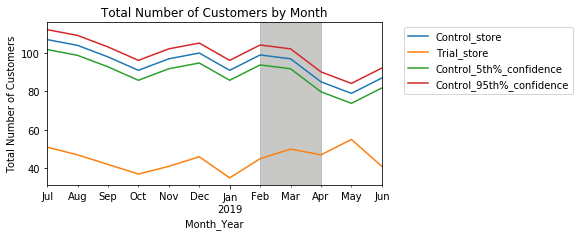

In [508]:
from matplotlib import pyplot
import statistics 

Monthly_mean_customer_store77 = QVI_data.groupby(['STORE_NBR','Month_Year'])['LYLTY_CARD_NBR'].agg(lambda x: len(x.unique())).reset_index()


###############################################################################################


conditions = [
    (Monthly_mean_customer_store77['STORE_NBR']==77),
    (Monthly_mean_customer_store77['STORE_NBR']==119),
    ((Monthly_mean_customer_store77['STORE_NBR']!=77) & (Monthly_mean_customer_store77['STORE_NBR']!=119))
     ]

values = ['Trial_store', 'Control_store', 'Other_stores']

Monthly_mean_customer_store77['Store_type'] = np.select(conditions, values)

Monthly_mean_customer_store77 = Monthly_mean_customer_store77.groupby(['Month_Year', 'Store_type'])['LYLTY_CARD_NBR'].mean().reset_index()
#print(Monthly_mean_customer_store77)
povit_customer_store77 = Monthly_mean_customer_store77.pivot(index='Month_Year', columns='Store_type', values='LYLTY_CARD_NBR')

povit_customer_store77 = povit_customer_store77.drop('Other_stores', axis=1)

### create a more visual version of this by plotting the number of customer of the control store, the num. of customer of the trial store 77 and
## the 95th percentile value of sales of the control store.  


confidence = 0.95
n = len(povit_customer_store77['Control_store'])

std_err = sem(povit_customer_store77['Control_store'])

h = std_err * t.ppf((1 + confidence) / 2, n - 1)

povit_customer_store77['Control_5th%_confidence'] = povit_customer_store77['Control_store'] - h
povit_customer_store77['Control_95th%_confidence'] = povit_customer_store77['Control_store'] + h
print(povit_customer_store77)



fig, ax = plt.subplots(1,1, figsize=(6,3), sharex=True)
ax.set_xlabel("Month of Operation")   
ax.set_ylabel("Total Number of Customers")

povit_customer_store77.plot(kind='line', title= "Total Number of Customers by Month",ax=ax).legend( bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='medium')

ax.axvspan('2019-02', '2019-04', color=sns.xkcd_rgb['grey'], alpha=0.5)
plt.show()




#########################

It looks like the number of customers is significantly lower in all of the three months. This seems to suggest that the trial had a significant impact on decreasing the number of customers in trial store 86 . 

Store_type  Control_store  Other_stores  Trial_store
Month_Year                                          
2018-07             924.6    619.160985       892.20
2018-08             782.7    599.748276       764.05
2018-09            1014.4    605.316794       914.60
2018-10             963.8    617.884030       948.40
2018-11             898.8    604.644656       918.00
2018-12             849.8    636.867433       841.20
2019-01             874.6    616.575862       841.40
2019-02             891.2    568.170229       913.20


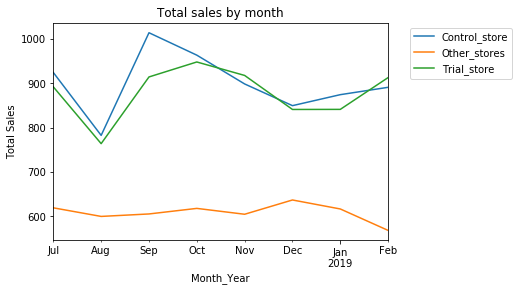

In [509]:

## The store with the highest score is selected as the control store since it is
## most similar to the trial store 86 .


## check visually if the drivers are indeed similar in the period before the trial 86 based on total sales

from matplotlib import pyplot

Monthly_mean_sales_revenue86 = QVI_data.groupby(['STORE_NBR','Month_Year'])['TOT_SALES'].sum().reset_index()

Monthly_mean_sales_revenue86 = Monthly_mean_sales_revenue86[Monthly_mean_sales_revenue86['Month_Year'] <'2019-03']

conditions = [
    (Monthly_mean_sales_revenue86['STORE_NBR']==86),
    (Monthly_mean_sales_revenue86['STORE_NBR']==155),
    ((Monthly_mean_sales_revenue86['STORE_NBR']!=86) & (Monthly_mean_sales_revenue86['STORE_NBR']!=155))
     ]

values = ['Trial_store', 'Control_store', 'Other_stores']

Monthly_mean_sales_revenue86['Store_type'] = np.select(conditions, values)
Monthly_mean_sales_revenue86 = Monthly_mean_sales_revenue86.groupby(['Month_Year', 'Store_type'])['TOT_SALES'].mean().reset_index()
povit_sales86 = Monthly_mean_sales_revenue86.pivot(index='Month_Year', columns='Store_type', values= 'TOT_SALES')

print(povit_sales86)

fig,ax = plt.subplots(1)
ax.set_xlabel("Month of Operation")   
ax.set_ylabel("Total Sales")

povit_sales86.plot(kind='line', title ='Total sales by month', ax=ax).legend( bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='medium')

We can see that the salses of control and trial stores are trending in a similar way.

Store_type  Control_store  Other_stores  Trial_store
Month_Year                                          
2018-07             101.0     70.378788         99.0
2018-08              91.0     71.007663         94.0
2018-09             103.0     68.645038        103.0
2018-10             108.0     69.783270        109.0
2018-11             101.0     69.076336        100.0
2018-12              97.0     72.340996         98.0
2019-01              96.0     70.011494         94.0
2019-02              95.0     65.064885        107.0


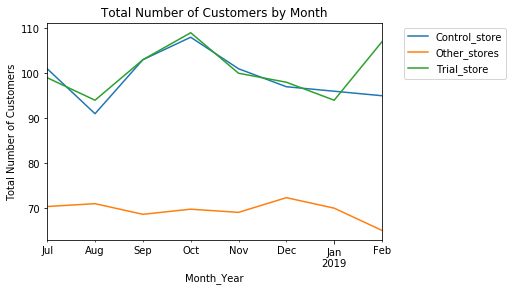

In [510]:
## The store with the highest score is selected as the control store since it is
## most similar to the trial store 86 .

## check visually if the drivers are indeed similar in the period before the trial 86 based on number of customers


from matplotlib import pyplot

Monthly_mean_customer_revenue86 = QVI_data.groupby(['STORE_NBR','Month_Year'])['LYLTY_CARD_NBR'].agg(lambda x: len(x.unique())).reset_index()

Monthly_mean_customer_revenue86 = Monthly_mean_customer_revenue86[Monthly_mean_customer_revenue86['Month_Year'] <'2019-03']

conditions = [
    (Monthly_mean_customer_revenue86['STORE_NBR']==86),
    (Monthly_mean_customer_revenue86['STORE_NBR']==155),
    ((Monthly_mean_customer_revenue86['STORE_NBR']!=86) & (Monthly_mean_customer_revenue86['STORE_NBR']!=155))
     ]

values = ['Trial_store', 'Control_store', 'Other_stores']

Monthly_mean_customer_revenue86['Store_type'] = np.select(conditions, values)
Monthly_mean_customer_revenue86 = Monthly_mean_customer_revenue86.groupby(['Month_Year', 'Store_type'])['LYLTY_CARD_NBR'].mean().reset_index()
povit_customer86 = Monthly_mean_customer_revenue86.pivot(index='Month_Year', columns='Store_type', values= 'LYLTY_CARD_NBR')

print(povit_customer86)

fig,ax = plt.subplots(1)
ax.set_xlabel("Month of Operation")   
ax.set_ylabel("Total Number of Customers")

povit_customer86.plot(kind='line',title='Total Number of Customers by Month', ax=ax).legend( bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='medium')

the two stores have almost the same trending in term of number of customers

Store_type  Control_store  Trial_store  Control_5th%_confidence  \
Month_Year                                                        
2018-07            924.60       892.20               883.116708   
2018-08            782.70       764.05               741.216708   
2018-09           1014.40       914.60               972.916708   
2018-10            963.80       948.40               922.316708   
2018-11            898.80       918.00               857.316708   
2018-12            849.80       841.20               808.316708   
2019-01            874.60       841.40               833.116708   
2019-02            891.20       913.20               849.716708   
2019-03            804.40      1026.80               762.916708   
2019-04            844.60       848.20               803.116708   
2019-05            922.85       889.30               881.366708   
2019-06            857.20       838.00               815.716708   

Store_type  Control_95th%_confidence  
Month_Year            

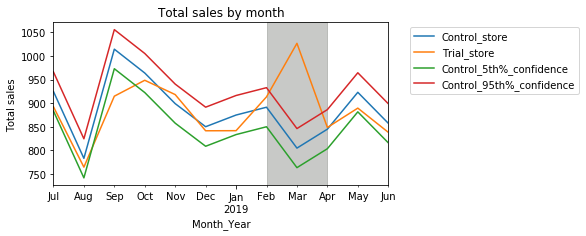

In [511]:

### create a more visual version of this by plotting the sales of the control store, the sales of the trial store 86 and
## the 95th percentile value of sales of the control store.  



from matplotlib import pyplot
import statistics 

Monthly_mean_sales_store86 = QVI_data.groupby(['STORE_NBR','Month_Year'])['TOT_SALES'].sum().reset_index()

###############################################################################################

conditions = [
    (Monthly_mean_sales_store86['STORE_NBR']==86),
    (Monthly_mean_sales_store86['STORE_NBR']==155),
    ((Monthly_mean_sales_store86['STORE_NBR']!=86) & (Monthly_mean_sales_store86['STORE_NBR']!=155))
     ]

values = ['Trial_store', 'Control_store', 'Other_stores']

Monthly_mean_sales_store86['Store_type'] = np.select(conditions, values)

Monthly_mean_sales_store86 = Monthly_mean_sales_store86.groupby(['Month_Year', 'Store_type'])['TOT_SALES'].mean().reset_index()

povit_sales_store86 = Monthly_mean_sales_store86.pivot(index='Month_Year', columns='Store_type', values= 'TOT_SALES')

povit_sales_store86 = povit_sales_store86.drop('Other_stores', axis=1)


confidence = 0.95
n = len(povit_sales_store86['Control_store'])

std_err = sem(povit_sales_store86['Control_store'])

h = std_err * t.ppf((1 + confidence) / 2, n - 1)

povit_sales_store86['Control_5th%_confidence'] = povit_sales_store86['Control_store'] - h
povit_sales_store86['Control_95th%_confidence'] = povit_sales_store86['Control_store'] + h
print(povit_sales_store86)


fig, ax = plt.subplots(1,1, figsize=(6,3), sharex=True)
ax.set_xlabel("Month of Operation")   
ax.set_ylabel("Total sales")


povit_sales_store86.plot(kind='line', title='Total sales by month',ax=ax).legend( bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='medium')

ax.axvspan('2019-02', '2019-04', color=sns.xkcd_rgb['grey'], alpha=0.5)
plt.show()


#########################

The trial is considerly similar to its control store in the trial period for Feb. and April as the trial store performance lies withen of the 5% to 95% confidence interval of the control store and in March it is outside the interval.
months.

Store_type  Control_store  Trial_store  Control_5th%_confidence  \
Month_Year                                                        
2018-07             101.0         99.0                97.750811   
2018-08              91.0         94.0                87.750811   
2018-09             103.0        103.0                99.750811   
2018-10             108.0        109.0               104.750811   
2018-11             101.0        100.0                97.750811   
2018-12              97.0         98.0                93.750811   
2019-01              96.0         94.0                92.750811   
2019-02              95.0        107.0                91.750811   
2019-03              94.0        115.0                90.750811   
2019-04              99.0        105.0                95.750811   
2019-05             106.0        104.0               102.750811   
2019-06              95.0         98.0                91.750811   

Store_type  Control_95th%_confidence  
Month_Year            

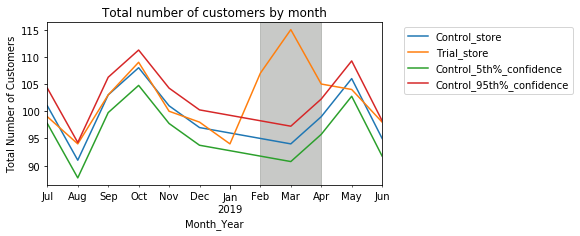

In [512]:
### create a more visual version of this by plotting the number of customer of the control store, the num. of customer 
## of the trial store 86 and the 95th percentile value of sales of the control store.  


from matplotlib import pyplot
import statistics 

Monthly_mean_customer_store86 = QVI_data.groupby(['STORE_NBR','Month_Year'])['LYLTY_CARD_NBR'].agg(lambda x: len(x.unique())).reset_index()


###############################################################################################


conditions = [
    (Monthly_mean_customer_store86['STORE_NBR']==86),
    (Monthly_mean_customer_store86['STORE_NBR']==155),
    ((Monthly_mean_customer_store86['STORE_NBR']!=86) & (Monthly_mean_customer_store86['STORE_NBR']!=155))
     ]

values = ['Trial_store', 'Control_store', 'Other_stores']

Monthly_mean_customer_store86['Store_type'] = np.select(conditions, values)

Monthly_mean_customer_store86 = Monthly_mean_customer_store86.groupby(['Month_Year', 'Store_type'])['LYLTY_CARD_NBR'].mean().reset_index()
##print(Monthly_mean_customer_store86)
povit_customer_store86 = Monthly_mean_customer_store86.pivot(index='Month_Year', columns='Store_type', values='LYLTY_CARD_NBR')

povit_customer_store86 = povit_customer_store86.drop('Other_stores', axis=1)

from scipy.stats import sem, t
from scipy import mean


confidence = 0.95
n = len(povit_customer_store86['Control_store'])

std_err = sem(povit_customer_store86['Control_store'])

h = std_err * t.ppf((1 + confidence) / 2, n - 1)

povit_customer_store86['Control_5th%_confidence'] = povit_customer_store86['Control_store'] - h
povit_customer_store86['Control_95th%_confidence'] = povit_customer_store86['Control_store'] + h
print(povit_customer_store86)

fig, ax = plt.subplots(1,1, figsize=(6,3), sharex=True)
ax.set_xlabel("Month of Operation")   
ax.set_ylabel("Total Number of Customers")

povit_customer_store86.plot(kind='line', title = "Total number of customers by month",ax=ax).legend( bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='medium')

ax.axvspan('2019-02', '2019-04', color=sns.xkcd_rgb['grey'], alpha=0.5)
plt.show()

#########################

we can notice that the number of customer higher than the customers in the control store in trial period for the three months

Store_type  Control_store  Other_stores  Trial_store
Month_Year                                          
2018-07             952.0    617.474621       1310.0
2018-08             915.5    597.094828       1323.8
2018-09             954.4    603.605344       1423.0
2018-10             962.6    616.352471       1352.4
2018-11             975.6    602.577481       1382.8
2018-12             947.2    634.639847       1325.2
2019-01             837.2    615.090805       1266.4
2019-02            1088.8    565.671756       1370.2


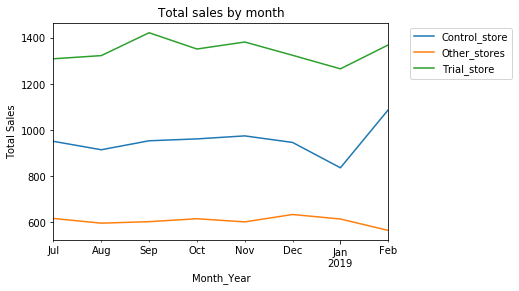

In [513]:

## The store with the highest score is selected as the control store since it is
## most similar to the trial store 88 .


## check visually if the drivers are indeed similar in the period before the trial 88 based on total sales


from matplotlib import pyplot

Monthly_mean_sales_revenue88 = QVI_data.groupby(['STORE_NBR','Month_Year'])['TOT_SALES'].sum().reset_index()

Monthly_mean_sales_revenue88 = Monthly_mean_sales_revenue88[Monthly_mean_sales_revenue88['Month_Year'] <'2019-03']

conditions = [
    (Monthly_mean_sales_revenue88['STORE_NBR']==88),
    (Monthly_mean_sales_revenue88['STORE_NBR']==178),
    ((Monthly_mean_sales_revenue88['STORE_NBR']!=88) & (Monthly_mean_sales_revenue88['STORE_NBR']!=178))
     ]

values = ['Trial_store', 'Control_store', 'Other_stores']

Monthly_mean_sales_revenue88['Store_type'] = np.select(conditions, values)

Monthly_mean_sales_revenue88 = Monthly_mean_sales_revenue88.groupby(['Month_Year', 'Store_type'])['TOT_SALES'].mean().reset_index()
povit_sales88 = Monthly_mean_sales_revenue88.pivot(index='Month_Year', columns='Store_type', values= 'TOT_SALES')

print(povit_sales88)

fig,ax = plt.subplots(1)
ax.set_xlabel("Month of Operation")   
ax.set_ylabel("Total Sales")

povit_sales88.plot(kind='line', title ='Total sales by month', ax=ax).legend( bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='medium')

the store 88 have the same trend of sales as in store 178

Store_type  Control_store  Other_stores  Trial_store
Month_Year                                          
2018-07             107.0     70.242424        129.0
2018-08             108.0     70.800766        131.0
2018-09             101.0     68.572519        124.0
2018-10             102.0     69.752852        123.0
2018-11             111.0     68.923664        130.0
2018-12             101.0     72.218391        126.0
2019-01              95.0     69.927203        117.0
2019-02             107.0     64.954198        124.0


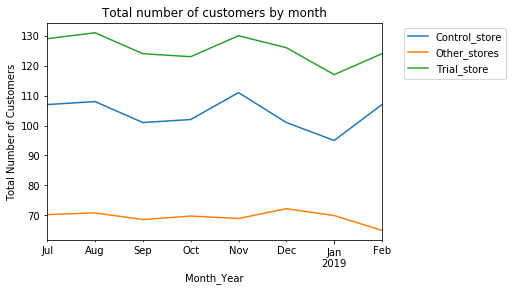

In [514]:

## The store with the highest score is selected as the control store since it is
## most similar to the trial store 88.

## check visually if the drivers are indeed similar in the period before the trial 88 based on number of customers


from matplotlib import pyplot

Monthly_mean_customer_revenue88 = QVI_data.groupby(['STORE_NBR','Month_Year'])['LYLTY_CARD_NBR'].agg(lambda x: len(x.unique())).reset_index()

Monthly_mean_customer_revenue88 = Monthly_mean_customer_revenue88[Monthly_mean_customer_revenue88['Month_Year'] <'2019-03']

conditions = [
    (Monthly_mean_customer_revenue88['STORE_NBR']==88),
    (Monthly_mean_customer_revenue88['STORE_NBR']==178),
    ((Monthly_mean_customer_revenue88['STORE_NBR']!=88) & (Monthly_mean_customer_revenue88['STORE_NBR']!=178))
     ]

values = ['Trial_store', 'Control_store', 'Other_stores']

Monthly_mean_customer_revenue88['Store_type'] = np.select(conditions, values)
Monthly_mean_customer_revenue88 = Monthly_mean_customer_revenue88.groupby(['Month_Year', 'Store_type'])['LYLTY_CARD_NBR'].mean().reset_index()
povit_customer88 = Monthly_mean_customer_revenue88.pivot(index='Month_Year', columns='Store_type', values= 'LYLTY_CARD_NBR')

print(povit_customer88)

fig,ax = plt.subplots(1)
ax.set_xlabel("Month of Operation")   
ax.set_ylabel("Total Number of Customers")
povit_customer88.plot(kind='line', title ='Total number of customers by month', ax=ax).legend( bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='medium')

the in term of num. of customers

Store_type  Control_store  Trial_store  Control_5th%_confidence  \
Month_Year                                                        
2018-07             952.0      1310.00               890.450803   
2018-08             915.5      1323.80               853.950803   
2018-09             954.4      1423.00               892.850803   
2018-10             962.6      1352.40               901.050803   
2018-11             975.6      1382.80               914.050803   
2018-12             947.2      1325.20               885.650803   
2019-01             837.2      1266.40               775.650803   
2019-02            1088.8      1370.20              1027.250803   
2019-03             998.8      1477.20               937.250803   
2019-04            1059.8      1439.40               998.250803   
2019-05             888.0      1308.25               826.450803   
2019-06             722.6      1354.60               661.050803   

Store_type  Control_95th%_confidence  
Month_Year            

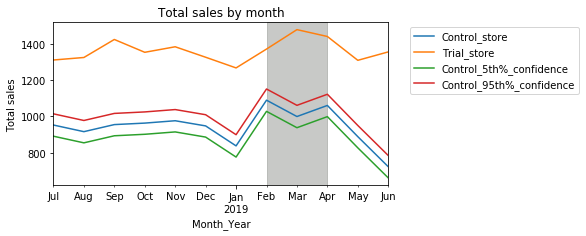

In [515]:
### create a more visual version of this by plotting the sales of the control store, the sales of the trial store 88 and
## the 95th percentile value of sales of the control store.  




from matplotlib import pyplot
import statistics 

Monthly_mean_sales_store88 = QVI_data.groupby(['STORE_NBR','Month_Year'])['TOT_SALES'].sum().reset_index()


###############################################################################################


conditions = [
    (Monthly_mean_sales_store88['STORE_NBR']==88),
    (Monthly_mean_sales_store88['STORE_NBR']==178),
    ((Monthly_mean_sales_store88['STORE_NBR']!=88) & (Monthly_mean_sales_store88['STORE_NBR']!=178))
     ]

values = ['Trial_store', 'Control_store', 'Other_stores']

Monthly_mean_sales_store88['Store_type'] = np.select(conditions, values)

Monthly_mean_sales_store88 = Monthly_mean_sales_store88.groupby(['Month_Year', 'Store_type'])['TOT_SALES'].mean().reset_index()

povit_sales_store88 = Monthly_mean_sales_store88.pivot(index='Month_Year', columns='Store_type', values= 'TOT_SALES')

povit_sales_store88 = povit_sales_store88.drop('Other_stores', axis=1)

from scipy.stats import sem, t
from scipy import mean
confidence = 0.95
n = len(povit_sales_store88['Control_store'])

std_err = sem(povit_sales_store88['Control_store'])

h = std_err * t.ppf((1 + confidence) / 2, n - 1)

povit_sales_store88['Control_5th%_confidence'] = povit_sales_store88['Control_store'] - h
povit_sales_store88['Control_95th%_confidence'] = povit_sales_store88['Control_store'] + h
print(povit_sales_store88)


fig, ax = plt.subplots(1,1, figsize=(6,3), sharex=True)
ax.set_xlabel("Month of Operation")   
ax.set_ylabel("Total sales")

povit_sales_store88.plot(kind='line', title='Total sales by month' , ax=ax).legend( bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='medium')

ax.axvspan('2019-02', '2019-04', color=sns.xkcd_rgb['grey'], alpha=0.5)
plt.show()

#########################

The results show that the trial in store 88 is significantly different to itscontrol store in the trial period 
as the trial store performance lies outside of the 5% to 95% confidence interval of the control store in the three trial months.

Store_type  Control_store  Trial_store  Control_5th%_confidence  \
Month_Year                                                        
2018-07             107.0        129.0               102.322171   
2018-08             108.0        131.0               103.322171   
2018-09             101.0        124.0                96.322171   
2018-10             102.0        123.0                97.322171   
2018-11             111.0        130.0               106.322171   
2018-12             101.0        126.0                96.322171   
2019-01              95.0        117.0                90.322171   
2019-02             107.0        124.0               102.322171   
2019-03             114.0        134.0               109.322171   
2019-04             117.0        128.0               112.322171   
2019-05             102.0        128.0                97.322171   
2019-06              92.0        121.0                87.322171   

Store_type  Control_95th%_confidence  
Month_Year            

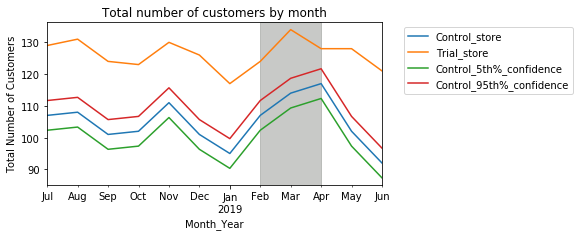

In [516]:
### create a more visual version of this by plotting the number of customer of the control store, the num. of customer 
## of the trial store 88 and the 95th percentile value of sales of the control store.  



from matplotlib import pyplot as plt
import statistics 

Monthly_mean_customer_store88 = QVI_data.groupby(['STORE_NBR','Month_Year'])['LYLTY_CARD_NBR'].agg(lambda x: len(x.unique())).reset_index()


###############################################################################################


conditions = [
    (Monthly_mean_customer_store88['STORE_NBR']==88),
    (Monthly_mean_customer_store88['STORE_NBR']==178),
    ((Monthly_mean_customer_store88['STORE_NBR']!=88) & (Monthly_mean_customer_store88['STORE_NBR']!=178))
     ]

values = ['Trial_store', 'Control_store', 'Other_stores']

Monthly_mean_customer_store88['Store_type'] = np.select(conditions, values)

Monthly_mean_customer_store88 = Monthly_mean_customer_store88.groupby(['Month_Year', 'Store_type'])['LYLTY_CARD_NBR'].mean().reset_index()
#print(Monthly_mean_customer_store88)
povit_customer_store88 = Monthly_mean_customer_store88.pivot(index='Month_Year', columns='Store_type', values='LYLTY_CARD_NBR')

povit_customer_store88 = povit_customer_store88.drop('Other_stores', axis=1)



confidence = 0.95
n = len(povit_customer_store88['Control_store'])

std_err = sem(povit_customer_store88['Control_store'])

h = std_err * t.ppf((1 + confidence) / 2, n - 1)

povit_customer_store88['Control_5th%_confidence'] = povit_customer_store88['Control_store'] - h
povit_customer_store88['Control_95th%_confidence'] = povit_customer_store88['Control_store'] + h
print(povit_customer_store88)


fig, ax = plt.subplots(1,1, figsize=(6,3), sharex=True)
ax.set_xlabel("Month of Operation")   
ax.set_ylabel("Total Number of Customers")

povit_customer_store88.plot(kind='line',title='Total number of customers by month', ax=ax).legend( bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='medium')
ax.axvspan('2019-02', '2019-04', color=sns.xkcd_rgb['grey'], alpha=0.5)
plt.show()

the same as in the total sales, the trial higher than the control in the trial inertval period.

In the following code we will start the second solution by using K-nearest neighbour algorithm

In [517]:

### Specify desired values of our features data points 
#### create dataframe for all control stores as index and values for three metrics measures for the pretrial period.

control_Stores = preTrialMeasures[~ preTrialMeasures.STORE_NBR.isin([77, 86, 88 ])]

result = control_Stores.pivot(index='STORE_NBR', columns='Month_Year', values= ['TOT_SALES', 'NoCustomer', 'NoTxnPerCustomer'])

print(result.head())

### return list of list of the three features to compare foe all control stores

X = result.iloc[0:272,:].values.tolist()

#print(X)


           TOT_SALES                                                   \
Month_Year   2018-07  2018-08 2018-09 2018-10 2018-11 2018-12 2019-01   
STORE_NBR                                                               
1              206.9   176.10   278.8   188.1   192.6   189.6   154.8   
2              150.8   193.80   154.4   167.8   162.9   136.0   162.8   
3             1205.7  1079.75  1021.5  1037.9  1008.0  1121.6  1051.7   
4             1399.9  1259.50  1198.6  1346.4  1212.0  1185.6  1525.0   
5              812.0   745.10   896.0   798.0   771.4   879.2   838.0   

           NoCustomer                  ...                          \
Month_Year    2018-07 2018-08 2018-09  ... 2018-11 2018-12 2019-01   
STORE_NBR                              ...                           
1                49.0    42.0    59.0  ...    46.0    42.0    35.0   
2                39.0    39.0    36.0  ...    39.0    35.0    43.0   
3               112.0   112.0   102.0  ...   101.0   111.0   102.

In [518]:
### Specify desired values of our target data points 
## #### create dataframe for the three trial stores as index and values for three metrics measures for the pretrial period.

trial_stores = preTrialMeasures[preTrialMeasures.STORE_NBR.isin([77, 86, 88 ])]
#print(trial_stores)
T = trial_stores.pivot(index='STORE_NBR', columns='Month_Year', values= ['TOT_SALES', 'NoCustomer', 'NoTxnPerCustomer'])
print(T)

 ### find the target store 77
    
target77_sale = T.iloc[0:1, :].values.tolist()

#print(target77_sale)

####################################################################################################################

### Add the nearest nrighbors algorithm and specify the number of closest neighbors (3)

import sklearn 
from sklearn.neighbors import NearestNeighbors

algorithm = NearestNeighbors(n_neighbors = 3).fit(X)

print(algorithm.kneighbors(target77_sale))

           TOT_SALES                                                   \
Month_Year   2018-07  2018-08 2018-09 2018-10 2018-11 2018-12 2019-01   
STORE_NBR                                                               
77             296.8   255.50   225.2   204.5   245.3   267.3   204.4   
86             892.2   764.05   914.6   948.4   918.0   841.2   841.4   
88            1310.0  1323.80  1423.0  1352.4  1382.8  1325.2  1266.4   

           NoCustomer                  ...                          \
Month_Year    2018-07 2018-08 2018-09  ... 2018-11 2018-12 2019-01   
STORE_NBR                              ...                           
77               51.0    47.0    42.0  ...    41.0    46.0    35.0   
86               99.0    94.0   103.0  ...   100.0    98.0    94.0   
88              129.0   131.0   124.0  ...   130.0   126.0   117.0   

           NoTxnPerCustomer                                                    \
Month_Year          2018-07   2018-08   2018-09   2018-10  

The first array contains the distance from the trail store 77 to each control stors, while the second array contains the corresponding row position of each nieghbor.

In [519]:
### find the store id from the index row

print(result.iloc[218].name)
print('###############')

### we find the closed control store is 233  to the trial store 77

print(control_Stores[control_Stores['STORE_NBR']==233])

233
###############
      STORE_NBR Month_Year  TOT_SALES  NoCustomer  NoTxnPerCustomer  \
2699        233    2018-07      290.7          51          1.058824   
2700        233    2018-08      285.9          48          1.041667   
2701        233    2018-09      228.6          42          1.071429   
2702        233    2018-10      185.7          35          1.028571   
2703        233    2018-11      211.6          40          1.025000   
2704        233    2018-12      279.8          47          1.063830   
2705        233    2019-01      177.5          35          1.000000   

      NoChipsPerTxn  AvgPricePerUnit  
2699       1.629630         3.303409  
2700       1.600000         3.573750  
2701       1.555556         3.265714  
2702       1.555556         3.316071  
2703       1.512195         3.412903  
2704       1.500000         3.730667  
2705       1.342857         3.776596  


In [520]:

### Specify desired values of our target data points 
## #### create dataframe for the three trial stores as index and values for three metrics measures for the pretrial period.


trial_stores = preTrialMeasures[preTrialMeasures.STORE_NBR.isin([77, 86, 88 ])]
#print(trial_stores)
T = trial_stores.pivot(index='STORE_NBR', columns='Month_Year', values= ['TOT_SALES', 'NoCustomer', 'NoTxnPerCustomer'])

### find the target store 86

target86_sale = T.iloc[1:2, :].values.tolist()

#print(target86_sale)

####################################################################################################################

### Add the nearest nrighbors algorithm and specify the number of closest neighbors (3)

import sklearn 
from sklearn.neighbors import NearestNeighbors

algorithm = NearestNeighbors(n_neighbors = 3).fit(X)

print(algorithm.kneighbors(target86_sale))



(array([[106.1667979 , 114.71564041, 125.2684122 ]]), array([[ 99, 144, 210]], dtype=int32))


In [521]:
### find the store id from the index row
print(result.iloc[99].name)

### we find the closed control store is 109  to the trial store 86

print('###############')
print(control_Stores[control_Stores['STORE_NBR']==109])

109
###############
      STORE_NBR Month_Year  TOT_SALES  NoCustomer  NoTxnPerCustomer  \
1242        109    2018-07      884.0         108          1.259259   
1243        109    2018-08      828.3          89          1.325843   
1244        109    2018-09      871.4         102          1.205882   
1245        109    2018-10      957.6         107          1.289720   
1246        109    2018-11      929.6         101          1.306931   
1247        109    2018-12      908.8         101          1.306931   
1248        109    2019-01      858.6          92          1.271739   

      NoChipsPerTxn  AvgPricePerUnit  
1242       2.014706         3.226277  
1243       1.906780         3.681333  
1244       2.016260         3.513710  
1245       2.000000         3.469565  
1246       2.015152         3.494737  
1247       2.045455         3.365926  
1248       2.000000         3.669231  


In [522]:

### Specify desired values of our target data points 
## #### create dataframe for the three trial stores as index and values for three metrics measures for the pretrial period.


trial_stores = preTrialMeasures[preTrialMeasures.STORE_NBR.isin([77, 86, 88 ])]
#print(trial_stores)
T = trial_stores.pivot(index='STORE_NBR', columns='Month_Year', values= ['TOT_SALES', 'NoCustomer', 'NoTxnPerCustomer'])

### find the target store 88

target88_sale = T.iloc[2:3, :].values.tolist()

#print(target88_sale)

####################################################################################################################

### Add the nearest nrighbors algorithm and specify the number of closest neighbors (3)


import sklearn 
from sklearn.neighbors import NearestNeighbors

algorithm = NearestNeighbors(n_neighbors = 3).fit(X)

print(algorithm.kneighbors(target88_sale))

(array([[193.18643897, 215.0900932 , 321.2663496 ]]), array([[222, 191, 154]], dtype=int32))


In [523]:
### find the store id from the index row
print(result.iloc[222].name)
print('###############')

### we find the closed control store is 109  to the trial store 88

print(control_Stores[control_Stores['STORE_NBR']==237])

237
###############
      STORE_NBR Month_Year  TOT_SALES  NoCustomer  NoTxnPerCustomer  \
2747        237    2018-07     1448.4         128          1.265625   
2748        237    2018-08     1367.8         135          1.222222   
2749        237    2018-09     1322.2         126          1.182540   
2750        237    2018-10     1348.3         123          1.195122   
2751        237    2018-11     1397.6         132          1.219697   
2752        237    2018-12     1265.0         124          1.161290   
2753        237    2019-01     1219.7         117          1.188034   

      NoChipsPerTxn  AvgPricePerUnit  
2747       2.000000         4.470370  
2748       1.896970         4.369968  
2749       2.006711         4.422074  
2750       2.034014         4.509365  
2751       1.987578         4.367500  
2752       2.006944         4.377163  
2753       1.992806         4.403249  


Store_type  Control_store  Other_stores  Trial_store
Month_Year                                          
2018-07             290.7    623.817424        296.8
2018-08             285.9    603.600192        255.5
2018-09             228.6    610.947328        225.2
2018-10             185.7    623.671103        204.5
2018-11             211.6    609.835115        245.3
2018-12             279.8    641.250192        267.3
2019-01             177.5    621.687356        204.4
2019-02             244.0    573.229008        235.0


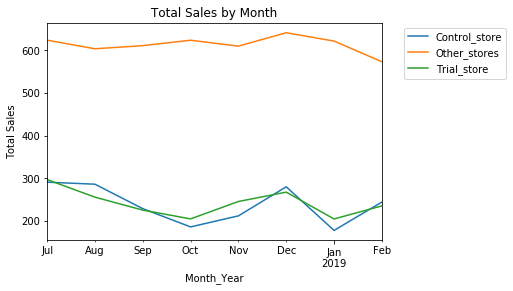

In [524]:

## check visually if the drivers are indeed similar in the period before the trial 77 based on number of customers

Monthly_mean_sales_revenue77 = QVI_data.groupby(['STORE_NBR','Month_Year'])['TOT_SALES'].sum().reset_index()

Monthly_mean_sales_revenue77 = Monthly_mean_sales_revenue77[Monthly_mean_sales_revenue77['Month_Year'] <'2019-03']

conditions = [
    (Monthly_mean_sales_revenue77['STORE_NBR']==77),
    (Monthly_mean_sales_revenue77['STORE_NBR']==233),
    ((Monthly_mean_sales_revenue77['STORE_NBR']!=77) & (Monthly_mean_sales_revenue77['STORE_NBR']!=233))
     ]

values = ['Trial_store', 'Control_store', 'Other_stores']

Monthly_mean_sales_revenue77['Store_type'] = np.select(conditions, values)
Monthly_mean_sales_revenue77 = Monthly_mean_sales_revenue77.groupby(['Month_Year', 'Store_type'])['TOT_SALES'].mean().reset_index()
povit_sales77 = Monthly_mean_sales_revenue77.pivot(index='Month_Year', columns='Store_type', values= 'TOT_SALES')

print(povit_sales77)


fig,ax = plt.subplots(1)
ax.set_xlabel("Month of Operation")   
ax.set_ylabel("Total Sales")

povit_sales77.plot(kind='line' , title='Total Sales by Month', ax=ax).legend( bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='medium')


we can see that the trending of sales in the same way in both trail and control stores 

Store_type  Control_store  Other_stores  Trial_store
Month_Year                                          
2018-07              51.0     70.750000         51.0
2018-08              48.0     71.352490         47.0
2018-09              42.0     69.110687         42.0
2018-10              35.0     70.334601         37.0
2018-11              40.0     69.534351         41.0
2018-12              47.0     72.731801         46.0
2019-01              35.0     70.471264         35.0
2019-02              45.0     65.492366         45.0


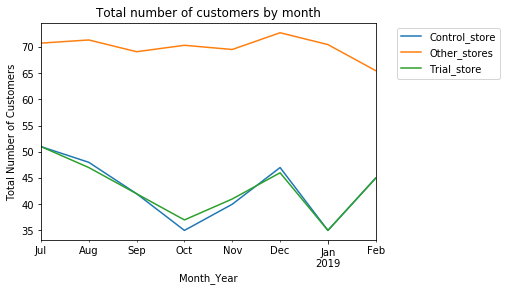

In [525]:
#### 

Monthly_mean_customer_revenue77 = QVI_data.groupby(['STORE_NBR','Month_Year'])['LYLTY_CARD_NBR'].agg(lambda x: len(x.unique())).reset_index()

Monthly_mean_customer_revenue77 = Monthly_mean_customer_revenue77[Monthly_mean_customer_revenue77['Month_Year'] <'2019-03']

conditions = [
    (Monthly_mean_customer_revenue77['STORE_NBR']==77),
    (Monthly_mean_customer_revenue77['STORE_NBR']==233),
    ((Monthly_mean_customer_revenue77['STORE_NBR']!=77) & (Monthly_mean_customer_revenue77['STORE_NBR']!=233))
     ]

values = ['Trial_store', 'Control_store', 'Other_stores']

Monthly_mean_customer_revenue77['Store_type'] = np.select(conditions, values)
Monthly_mean_customer_revenue77 = Monthly_mean_customer_revenue77.groupby(['Month_Year', 'Store_type'])['LYLTY_CARD_NBR'].mean().reset_index()
povit_customer77 = Monthly_mean_customer_revenue77.pivot(index='Month_Year', columns='Store_type', values= 'LYLTY_CARD_NBR')

print(povit_customer77)


fig,ax = plt.subplots(1)
ax.set_xlabel("Month of Operation")   
ax.set_ylabel("Total Number of Customers")

povit_customer77.plot(kind='line', title ='Total number of customers by month', ax=ax).legend( bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='medium')

Number of costumer significantly similar in both trail and control stores.

Store_type  Control_store  Trial_store  Control_5th%_confidence  \
Month_Year                                                        
2018-07             290.7        296.8               255.692885   
2018-08             285.9        255.5               250.892885   
2018-09             228.6        225.2               193.592885   
2018-10             185.7        204.5               150.692885   
2018-11             211.6        245.3               176.592885   
2018-12             279.8        267.3               244.792885   
2019-01             177.5        204.4               142.492885   
2019-02             244.0        235.0               208.992885   
2019-03             199.1        278.5               164.092885   
2019-04             158.6        263.5               123.592885   
2019-05             344.4        299.3               309.392885   
2019-06             221.0        264.7               185.992885   

Store_type  Control_95th%_confidence  
Month_Year            

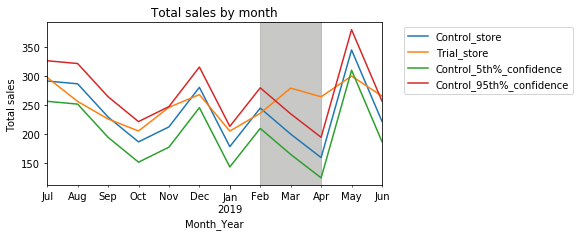

In [526]:


Monthly_mean_sales_store77 = QVI_data.groupby(['STORE_NBR','Month_Year'])['TOT_SALES'].sum().reset_index()

####################################################################
conditions = [
    (Monthly_mean_sales_store77['STORE_NBR']==77),
    (Monthly_mean_sales_store77['STORE_NBR']==233),
    ((Monthly_mean_sales_store77['STORE_NBR']!=77) & (Monthly_mean_sales_store77['STORE_NBR']!=233))
     ]

values = ['Trial_store', 'Control_store', 'Other_stores']

Monthly_mean_sales_store77['Store_type'] = np.select(conditions, values)

Monthly_mean_sales_store77 = Monthly_mean_sales_store77.groupby(['Month_Year', 'Store_type'])['TOT_SALES'].mean().reset_index()

povit_sales_store77 = Monthly_mean_sales_store77.pivot(index='Month_Year', columns='Store_type', values= 'TOT_SALES')

povit_sales_store77 = povit_sales_store77.drop('Other_stores', axis=1)

 ####################################################################################
    
    


confidence = 0.95
n = len(povit_sales_store77['Control_store'])

std_err = sem(povit_sales_store77['Control_store'])

h = std_err * t.ppf((1 + confidence) / 2, n - 1)

povit_sales_store77['Control_5th%_confidence'] = povit_sales_store77['Control_store'] - h
povit_sales_store77['Control_95th%_confidence'] = povit_sales_store77['Control_store'] + h
print(povit_sales_store77)

print(povit_sales_store77)


fig, ax = plt.subplots(1,1, figsize=(6,3), sharex=True)
ax.set_xlabel("Month of Operation")   
ax.set_ylabel("Total sales")


povit_sales_store77.plot(kind='line', title='Total sales by month' ,ax=ax).legend( bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='medium')

ax.axvspan('2019-02', '2019-04', color=sns.xkcd_rgb['grey'], alpha=0.5)
plt.show()


########################################################


The result shows that the trial store 77 is withen the 5% to 95% confidence interval of the control store in the first of the  trial period and then it went higher for the rest period

Store_type  Control_store  Trial_store  Control_5th%_confidence  \
Month_Year                                                        
2018-07              51.0         51.0                 46.21871   
2018-08              48.0         47.0                 43.21871   
2018-09              42.0         42.0                 37.21871   
2018-10              35.0         37.0                 30.21871   
2018-11              40.0         41.0                 35.21871   
2018-12              47.0         46.0                 42.21871   
2019-01              35.0         35.0                 30.21871   
2019-02              45.0         45.0                 40.21871   
2019-03              40.0         50.0                 35.21871   
2019-04              30.0         47.0                 25.21871   
2019-05              57.0         55.0                 52.21871   
2019-06              41.0         41.0                 36.21871   

Store_type  Control_95th%_confidence  
Month_Year            

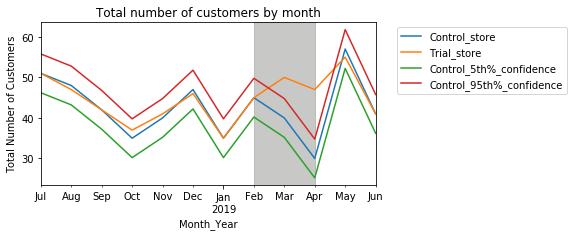

In [527]:


Monthly_mean_customer_store77 = QVI_data.groupby(['STORE_NBR','Month_Year'])['LYLTY_CARD_NBR'].agg(lambda x: len(x.unique())).reset_index()


###############################################################################################


conditions = [
    (Monthly_mean_customer_store77['STORE_NBR']==77),
    (Monthly_mean_customer_store77['STORE_NBR']==233),
    ((Monthly_mean_customer_store77['STORE_NBR']!=77) & (Monthly_mean_customer_store77['STORE_NBR']!=233))
     ]

values = ['Trial_store', 'Control_store', 'Other_stores']

Monthly_mean_customer_store77['Store_type'] = np.select(conditions, values)

Monthly_mean_customer_store77 = Monthly_mean_customer_store77.groupby(['Month_Year', 'Store_type'])['LYLTY_CARD_NBR'].mean().reset_index()
##print(Monthly_mean_customer_store77)
povit_customer_store77 = Monthly_mean_customer_store77.pivot(index='Month_Year', columns='Store_type', values='LYLTY_CARD_NBR')

povit_customer_store77 = povit_customer_store77.drop('Other_stores', axis=1)


confidence = 0.95
n = len(povit_customer_store77['Control_store'])

std_err = sem(povit_customer_store77['Control_store'])

h = std_err * t.ppf((1 + confidence) / 2, n - 1)

povit_customer_store77['Control_5th%_confidence'] = povit_customer_store77['Control_store'] - h
povit_customer_store77['Control_95th%_confidence'] = povit_customer_store77['Control_store'] + h
print(povit_customer_store77)


fig, ax = plt.subplots(1,1, figsize=(6,3), sharex=True)
ax.set_xlabel("Month of Operation")   
ax.set_ylabel("Total Number of Customers")

povit_customer_store77.plot(kind='line', title='Total number of customers by month',ax=ax).legend( bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='medium')

ax.axvspan('2019-02', '2019-04', color=sns.xkcd_rgb['grey'], alpha=0.5)
plt.show()


#########################

Total number of customers in the trial period for the trial store is almost similar to the control store for two out of three months, which indicates a positive trial effect.


Store_type  Control_store  Other_stores  Trial_store
Month_Year                                          
2018-07             884.0    619.314773       892.20
2018-08             828.3    599.573563       764.05
2018-09             871.4    605.862595       914.60
2018-10             957.6    617.907605       948.40
2018-11             929.6    604.527099       918.00
2018-12             908.8    636.641379       841.20
2019-01             858.6    616.637165       841.40
2019-02             858.4    568.295420       913.20


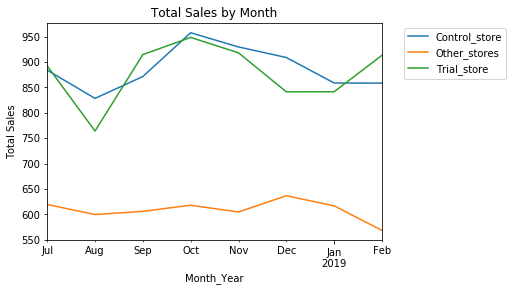

In [528]:


Monthly_mean_sales_revenue86 = QVI_data.groupby(['STORE_NBR','Month_Year'])['TOT_SALES'].sum().reset_index()

Monthly_mean_sales_revenue86 = Monthly_mean_sales_revenue86[Monthly_mean_sales_revenue86['Month_Year'] <'2019-03']

conditions = [
    (Monthly_mean_sales_revenue86['STORE_NBR']==86),
    (Monthly_mean_sales_revenue86['STORE_NBR']==109),
    ((Monthly_mean_sales_revenue86['STORE_NBR']!=86) & (Monthly_mean_sales_revenue86['STORE_NBR']!=109))
     ]

values = ['Trial_store', 'Control_store', 'Other_stores']

Monthly_mean_sales_revenue86['Store_type'] = np.select(conditions, values)
Monthly_mean_sales_revenue86 = Monthly_mean_sales_revenue86.groupby(['Month_Year', 'Store_type'])['TOT_SALES'].mean().reset_index()
povit_sales86 = Monthly_mean_sales_revenue86.pivot(index='Month_Year', columns='Store_type', values= 'TOT_SALES')

print(povit_sales86)

fig,ax = plt.subplots(1)
ax.set_xlabel("Month of Operation")   
ax.set_ylabel("Total Sales")

povit_sales86.plot(kind='line', title='Total Sales by Month', ax=ax).legend( bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='medium')

the trending of sales in the same way in both trail  86 and control 109 stores

Store_type  Control_store  Other_stores  Trial_store
Month_Year                                          
2018-07             108.0     70.352273         99.0
2018-08              89.0     71.015326         94.0
2018-09             102.0     68.648855        103.0
2018-10             107.0     69.787072        109.0
2018-11             101.0     69.076336        100.0
2018-12             101.0     72.325670         98.0
2019-01              92.0     70.026820         94.0
2019-02              91.0     65.080153        107.0


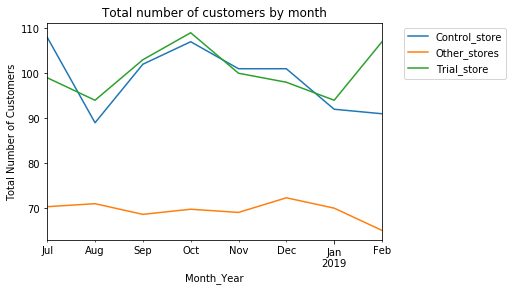

In [529]:

Monthly_mean_customer_revenue86 = QVI_data.groupby(['STORE_NBR','Month_Year'])['LYLTY_CARD_NBR'].agg(lambda x: len(x.unique())).reset_index()

Monthly_mean_customer_revenue86 = Monthly_mean_customer_revenue86[Monthly_mean_customer_revenue86['Month_Year'] <'2019-03']

conditions = [
    (Monthly_mean_customer_revenue86['STORE_NBR']==86),
    (Monthly_mean_customer_revenue86['STORE_NBR']==109),
    ((Monthly_mean_customer_revenue86['STORE_NBR']!=86) & (Monthly_mean_customer_revenue86['STORE_NBR']!=109))
     ]

values = ['Trial_store', 'Control_store', 'Other_stores']

Monthly_mean_customer_revenue86['Store_type'] = np.select(conditions, values)
Monthly_mean_customer_revenue86 = Monthly_mean_customer_revenue86.groupby(['Month_Year', 'Store_type'])['LYLTY_CARD_NBR'].mean().reset_index()
povit_customer86 = Monthly_mean_customer_revenue86.pivot(index='Month_Year', columns='Store_type', values= 'LYLTY_CARD_NBR')

print(povit_customer86)

fig,ax = plt.subplots(1)
ax.set_xlabel("Month of Operation")   
ax.set_ylabel("Total Number of Customers")

povit_customer86.plot(kind='line', title ='Total number of customers by month', ax=ax).legend( bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='medium')

the trending of cusromers  in the same way in both trail  86 and control 109 stores except the end of graph

Store_type  Control_store  Trial_store  Control_5th%_confidence  \
Month_Year                                                        
2018-07             884.0       892.20               826.889846   
2018-08             828.3       764.05               771.189846   
2018-09             871.4       914.60               814.289846   
2018-10             957.6       948.40               900.489846   
2018-11             929.6       918.00               872.489846   
2018-12             908.8       841.20               851.689846   
2019-01             858.6       841.40               801.489846   
2019-02             858.4       913.20               801.289846   
2019-03            1039.2      1026.80               982.089846   
2019-04             728.6       848.20               671.489846   
2019-05             720.6       889.30               663.489846   
2019-06             814.0       838.00               756.889846   

Store_type  Control_95th%_confidence  
Month_Year            

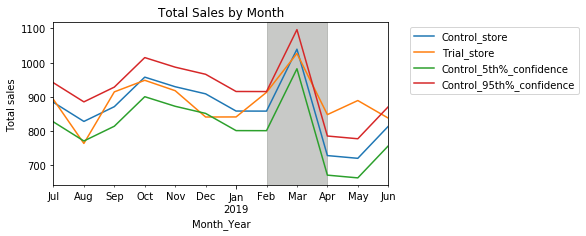

In [530]:


Monthly_mean_sales_store86 = QVI_data.groupby(['STORE_NBR','Month_Year'])['TOT_SALES'].sum().reset_index()

###############################################################################################

conditions = [
    (Monthly_mean_sales_store86['STORE_NBR']==86),
    (Monthly_mean_sales_store86['STORE_NBR']==109),
    ((Monthly_mean_sales_store86['STORE_NBR']!=86) & (Monthly_mean_sales_store86['STORE_NBR']!=109))
     ]

values = ['Trial_store', 'Control_store', 'Other_stores']

Monthly_mean_sales_store86['Store_type'] = np.select(conditions, values)

Monthly_mean_sales_store86 = Monthly_mean_sales_store86.groupby(['Month_Year', 'Store_type'])['TOT_SALES'].mean().reset_index()

povit_sales_store86 = Monthly_mean_sales_store86.pivot(index='Month_Year', columns='Store_type', values= 'TOT_SALES')

povit_sales_store86 = povit_sales_store86.drop('Other_stores', axis=1)


confidence = 0.95
n = len(povit_sales_store86['Control_store'])

std_err = sem(povit_sales_store86['Control_store'])

h = std_err * t.ppf((1 + confidence) / 2, n - 1)

povit_sales_store86['Control_5th%_confidence'] = povit_sales_store86['Control_store'] - h
povit_sales_store86['Control_95th%_confidence'] = povit_sales_store86['Control_store'] + h
print(povit_sales_store86)



fig, ax = plt.subplots(1,1, figsize=(6,3), sharex=True)
ax.set_xlabel("Month of Operation")   
ax.set_ylabel("Total sales")



povit_sales_store86.plot(kind='line', title='Total Sales by Month',ax=ax).legend( bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='medium')

ax.axvspan('2019-02', '2019-04', color=sns.xkcd_rgb['grey'], alpha=0.5)
plt.show()


#########################

The results show that the trial in store 86 is significantly similar to its control store 109 in the trial period as the trial store performance lies intside of the 5% to 95% confidence interval of the control store in two of the three trial
months, which indicates a positive trial effect.

Store_type  Control_store  Trial_store  Control_5th%_confidence  \
Month_Year                                                        
2018-07             108.0         99.0               101.707487   
2018-08              89.0         94.0                82.707487   
2018-09             102.0        103.0                95.707487   
2018-10             107.0        109.0               100.707487   
2018-11             101.0        100.0                94.707487   
2018-12             101.0         98.0                94.707487   
2019-01              92.0         94.0                85.707487   
2019-02              91.0        107.0                84.707487   
2019-03             114.0        115.0               107.707487   
2019-04              80.0        105.0                73.707487   
2019-05              90.0        104.0                83.707487   
2019-06              90.0         98.0                83.707487   

Store_type  Control_95th%_confidence  
Month_Year            

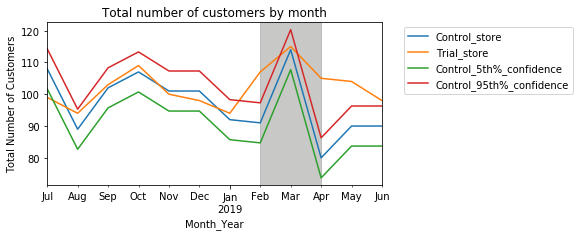

In [531]:
 

Monthly_mean_customer_store86 = QVI_data.groupby(['STORE_NBR','Month_Year'])['LYLTY_CARD_NBR'].agg(lambda x: len(x.unique())).reset_index()


###############################################################################################


conditions = [
    (Monthly_mean_customer_store86['STORE_NBR']==86),
    (Monthly_mean_customer_store86['STORE_NBR']==109),
    ((Monthly_mean_customer_store86['STORE_NBR']!=86) & (Monthly_mean_customer_store86['STORE_NBR']!=109))
     ]

values = ['Trial_store', 'Control_store', 'Other_stores']

Monthly_mean_customer_store86['Store_type'] = np.select(conditions, values)

Monthly_mean_customer_store86 = Monthly_mean_customer_store86.groupby(['Month_Year', 'Store_type'])['LYLTY_CARD_NBR'].mean().reset_index()
##print(Monthly_mean_customer_store86)
povit_customer_store86 = Monthly_mean_customer_store86.pivot(index='Month_Year', columns='Store_type', values='LYLTY_CARD_NBR')

povit_customer_store86 = povit_customer_store86.drop('Other_stores', axis=1)


confidence = 0.95
n = len(povit_customer_store86['Control_store'])

std_err = sem(povit_customer_store86['Control_store'])

h = std_err * t.ppf((1 + confidence) / 2, n - 1)

povit_customer_store86['Control_5th%_confidence'] = povit_customer_store86['Control_store'] - h
povit_customer_store86['Control_95th%_confidence'] = povit_customer_store86['Control_store'] + h
print(povit_customer_store86)



fig, ax = plt.subplots(1,1, figsize=(6,3), sharex=True)
ax.set_xlabel("Month of Operation")   
ax.set_ylabel("Total Number of Customers")

povit_customer_store86.plot(kind='line', title ='Total number of customers by month' ,ax=ax).legend( bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='medium')

ax.axvspan('2019-02', '2019-04', color=sns.xkcd_rgb['grey'], alpha=0.5)
plt.show()

#########################

Total number of customers in the trial period for the trial store 86 is almost similar to the control store 109 for one out of three months.


Store_type  Control_store  Other_stores  Trial_store
Month_Year                                          
2018-07            1448.4    615.594318       1310.0
2018-08            1367.8    595.361877       1323.8
2018-09            1322.2    602.201527       1423.0
2018-10            1348.3    614.885932       1352.4
2018-11            1397.6    600.966794       1382.8
2018-12            1265.0    633.422222       1325.2
2019-01            1219.7    613.625287       1266.4
2019-02            1404.8    564.465649       1370.2


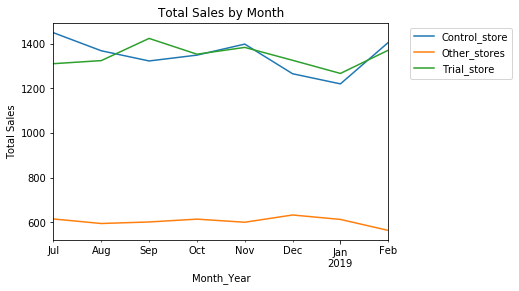

In [532]:

Monthly_mean_sales_revenue88 = QVI_data.groupby(['STORE_NBR','Month_Year'])['TOT_SALES'].sum().reset_index()

Monthly_mean_sales_revenue88 = Monthly_mean_sales_revenue88[Monthly_mean_sales_revenue88['Month_Year'] <'2019-03']

conditions = [
    (Monthly_mean_sales_revenue88['STORE_NBR']==88),
    (Monthly_mean_sales_revenue88['STORE_NBR']==237),
    ((Monthly_mean_sales_revenue88['STORE_NBR']!=88) & (Monthly_mean_sales_revenue88['STORE_NBR']!=237))
     ]

values = ['Trial_store', 'Control_store', 'Other_stores']

Monthly_mean_sales_revenue88['Store_type'] = np.select(conditions, values)

Monthly_mean_sales_revenue88 = Monthly_mean_sales_revenue88.groupby(['Month_Year', 'Store_type'])['TOT_SALES'].mean().reset_index()
povit_sales88 = Monthly_mean_sales_revenue88.pivot(index='Month_Year', columns='Store_type', values= 'TOT_SALES')

print(povit_sales88)

fig,ax = plt.subplots(1)
ax.set_xlabel("Month of Operation")   
ax.set_ylabel("Total Sales")

povit_sales88.plot(kind='line', title='Total Sales by Month', ax=ax).legend( bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='medium')

Store_type  Control_store  Other_stores  Trial_store
Month_Year                                          
2018-07             128.0     70.162879        129.0
2018-08             135.0     70.697318        131.0
2018-09             126.0     68.477099        124.0
2018-10             123.0     69.673004        123.0
2018-11             132.0     68.843511        130.0
2018-12             124.0     72.130268        126.0
2019-01             117.0     69.842912        117.0
2019-02             126.0     64.881679        124.0


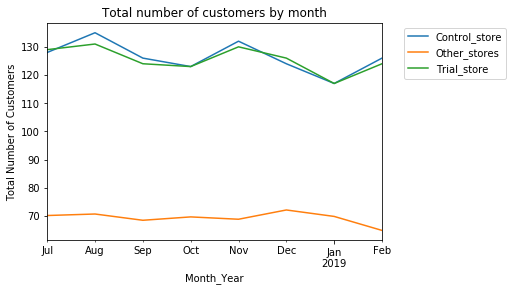

In [533]:
from matplotlib import pyplot

Monthly_mean_customer_revenue88 = QVI_data.groupby(['STORE_NBR','Month_Year'])['LYLTY_CARD_NBR'].agg(lambda x: len(x.unique())).reset_index()

Monthly_mean_customer_revenue88 = Monthly_mean_customer_revenue88[Monthly_mean_customer_revenue88['Month_Year'] <'2019-03']

conditions = [
    (Monthly_mean_customer_revenue88['STORE_NBR']==88),
    (Monthly_mean_customer_revenue88['STORE_NBR']==237),
    ((Monthly_mean_customer_revenue88['STORE_NBR']!=88) & (Monthly_mean_customer_revenue88['STORE_NBR']!=237))
     ]

values = ['Trial_store', 'Control_store', 'Other_stores']

Monthly_mean_customer_revenue88['Store_type'] = np.select(conditions, values)
Monthly_mean_customer_revenue88 = Monthly_mean_customer_revenue88.groupby(['Month_Year', 'Store_type'])['LYLTY_CARD_NBR'].mean().reset_index()
povit_customer88 = Monthly_mean_customer_revenue88.pivot(index='Month_Year', columns='Store_type', values= 'LYLTY_CARD_NBR')

print(povit_customer88)


fig,ax = plt.subplots(1)
ax.set_xlabel("Month of Operation")   
ax.set_ylabel("Total Number of Customers")

povit_customer88.plot(kind='line', title ='Total number of customers by month', ax=ax).legend( bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='medium')

the sales and customer graphes show considerably similarity between the trial store 88 and 237 control store.

Store_type  Control_store  Trial_store  Control_5th%_confidence  \
Month_Year                                                        
2018-07            1448.4      1310.00              1385.904373   
2018-08            1367.8      1323.80              1305.304373   
2018-09            1322.2      1423.00              1259.704373   
2018-10            1348.3      1352.40              1285.804373   
2018-11            1397.6      1382.80              1335.104373   
2018-12            1265.0      1325.20              1202.504373   
2019-01            1219.7      1266.40              1157.204373   
2019-02            1404.8      1370.20              1342.304373   
2019-03            1208.2      1477.20              1145.704373   
2019-04            1204.6      1439.40              1142.104373   
2019-05            1199.3      1308.25              1136.804373   
2019-06            1153.6      1354.60              1091.104373   

Store_type  Control_95th%_confidence  
Month_Year            

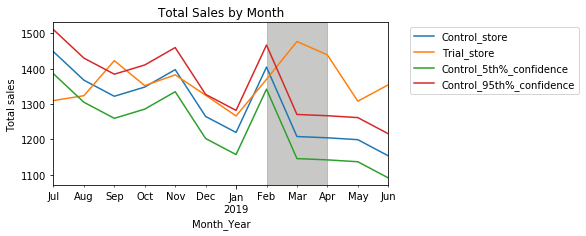

In [534]:
from matplotlib import pyplot
import statistics 

Monthly_mean_sales_store88 = QVI_data.groupby(['STORE_NBR','Month_Year'])['TOT_SALES'].sum().reset_index()


###############################################################################################

conditions = [
    (Monthly_mean_sales_store88['STORE_NBR']==88),
    (Monthly_mean_sales_store88['STORE_NBR']==237),
    ((Monthly_mean_sales_store88['STORE_NBR']!=88) & (Monthly_mean_sales_store88['STORE_NBR']!=237))
     ]

values = ['Trial_store', 'Control_store', 'Other_stores']

Monthly_mean_sales_store88['Store_type'] = np.select(conditions, values)

Monthly_mean_sales_store88 = Monthly_mean_sales_store88.groupby(['Month_Year', 'Store_type'])['TOT_SALES'].mean().reset_index()

povit_sales_store88 = Monthly_mean_sales_store88.pivot(index='Month_Year', columns='Store_type', values= 'TOT_SALES')

povit_sales_store88 = povit_sales_store88.drop('Other_stores', axis=1)


confidence = 0.95
n = len(povit_sales_store88['Control_store'])

std_err = sem(povit_sales_store88['Control_store'])

h = std_err * t.ppf((1 + confidence) / 2, n - 1)

povit_sales_store88['Control_5th%_confidence'] = povit_sales_store88['Control_store'] - h
povit_sales_store88['Control_95th%_confidence'] = povit_sales_store88['Control_store'] + h
print(povit_sales_store88)


fig, ax = plt.subplots(1,1, figsize=(6,3), sharex=True)
ax.set_xlabel("Month of Operation")   
ax.set_ylabel("Total sales")


povit_sales_store88.plot(kind='line', title='Total Sales by Month',ax=ax).legend( bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='medium')

ax.axvspan('2019-02', '2019-04', color=sns.xkcd_rgb['grey'], alpha=0.5)
plt.show()

#########################

The total sales in trial period for the trial store 88 is  higher than the control store 237 for last two out of three months.

Store_type  Control_store  Trial_store  Control_5th%_confidence  \
Month_Year                                                        
2018-07             128.0        129.0               124.458955   
2018-08             135.0        131.0               131.458955   
2018-09             126.0        124.0               122.458955   
2018-10             123.0        123.0               119.458955   
2018-11             132.0        130.0               128.458955   
2018-12             124.0        126.0               120.458955   
2019-01             117.0        117.0               113.458955   
2019-02             126.0        124.0               122.458955   
2019-03             119.0        134.0               115.458955   
2019-04             120.0        128.0               116.458955   
2019-05             129.0        128.0               125.458955   
2019-06             119.0        121.0               115.458955   

Store_type  Control_95th%_confidence  
Month_Year            

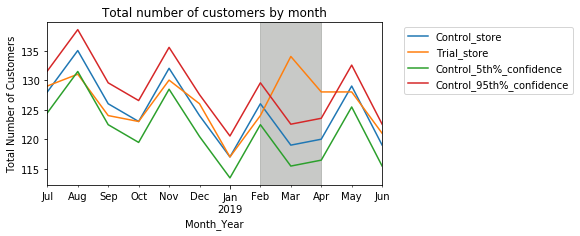

In [535]:
from matplotlib import pyplot as plt
import statistics 

Monthly_mean_customer_store88 = QVI_data.groupby(['STORE_NBR','Month_Year'])['LYLTY_CARD_NBR'].agg(lambda x: len(x.unique())).reset_index()


###############################################################################################


conditions = [
    (Monthly_mean_customer_store88['STORE_NBR']==88),
    (Monthly_mean_customer_store88['STORE_NBR']==237),
    ((Monthly_mean_customer_store88['STORE_NBR']!=88) & (Monthly_mean_customer_store88['STORE_NBR']!=237))
     ]

values = ['Trial_store', 'Control_store', 'Other_stores']

Monthly_mean_customer_store88['Store_type'] = np.select(conditions, values)

Monthly_mean_customer_store88 = Monthly_mean_customer_store88.groupby(['Month_Year', 'Store_type'])['LYLTY_CARD_NBR'].mean().reset_index()
# print(Monthly_mean_customer_store88)
povit_customer_store88 = Monthly_mean_customer_store88.pivot(index='Month_Year', columns='Store_type', values='LYLTY_CARD_NBR')

povit_customer_store88 = povit_customer_store88.drop('Other_stores', axis=1)

from scipy.stats import sem, t
from scipy import mean


confidence = 0.95
n = len(povit_customer_store88['Control_store'])

std_err = sem(povit_customer_store88['Control_store'])

h = std_err * t.ppf((1 + confidence) / 2, n - 1)

povit_customer_store88['Control_5th%_confidence'] = povit_customer_store88['Control_store'] - h
povit_customer_store88['Control_95th%_confidence'] = povit_customer_store88['Control_store'] + h
print(povit_customer_store88)


fig, ax = plt.subplots(1,1, figsize=(6,3), sharex=True)
ax.set_xlabel("Month of Operation")   
ax.set_ylabel("Total Number of Customers")

povit_customer_store88.plot( kind='line', title='Total number of customers by month',ax=ax).legend( bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='medium')
ax.axvspan('2019-02', '2019-04', color=sns.xkcd_rgb['grey'], alpha=0.5)
plt.show()

#########################

Total number of customers in the trial period for the trial store 88 is  higher than the control store 237 for two out of three months.

We have found control stores 119, 155, 178 for trial stores 77, 86 and 88 respectively for the first solution. However,  control stores are  233, 109, 237 in the second solution.

The second solution shows better result from first one as the control stores are more similar to the three trial stores. 
